In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sas
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

1. Easy: Load the Iris dataset into a Pandas DataFrame and display the first few rows.


In [27]:
df = pd.read_csv("Iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


2. Easy: How many samples (flowers) are in the dataset, and how many features (columns)
are there?

there is 150 flowers (sampels)
and 6 features (columns)

3. Easy: What are the names of the four features (measurements) in the dataset?

answer :
1.SepalLengthCm
2.SepalWidthCm
3.PetalLengthCm
4.PetalWidthCm

and Target Value is (Species)

In [28]:
df.drop(columns="Id" , inplace= True)

4. Easy: What are the unique species of iris flowers in the dataset?
  answer is : 3

In [29]:
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

5. Moderate: Calculate the mean, median, and standard deviation of the sepal length for each
species.

mean : 
1. SepalLengthCm = 5.843333
2. SepalWidthCm = 3.054000
3. PetalLengthCm = 3.758667
4. PetalWidthCm = 1.198667

median :
1. SepalLengthCm = 5.8
2. SepalWidthCm = 3
3. PetalLengthCm = 4.35
4. PetalWidthCm = 1.3

std :
1. SepalLengthCm = 0.828066
2. SepalWidthCm = 0.433594
3. PetalLengthCm = 1.764420 
4. PetalWidthCm = 0.763161


In [30]:
sepal_length_calcs = df.groupby('Species')['SepalLengthCm'].agg(['mean','median','std'])
print(sepal_length_calcs)

                  mean  median       std
Species                                 
Iris-setosa      5.006     5.0  0.352490
Iris-versicolor  5.936     5.9  0.516171
Iris-virginica   6.588     6.5  0.635880


In [31]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


6. Moderate: Create a scatter plot of sepal length vs. sepal width for all the samples. Use
different colors or markers to distinguish between species

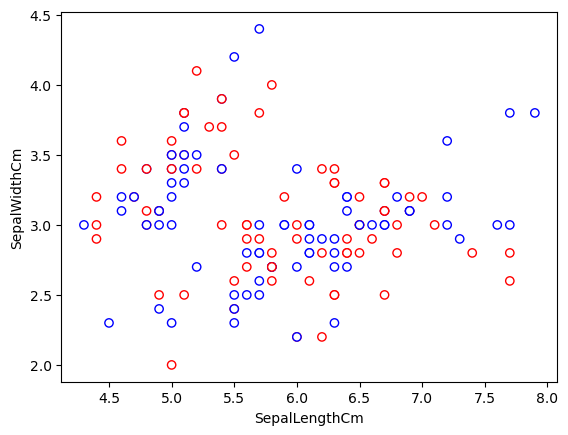

In [32]:
plt.scatter(data=df , x="SepalLengthCm" , y= "SepalWidthCm" ,c='white', edgecolors=['red','blue'] )
plt.xlabel("SepalLengthCm");
plt.ylabel("SepalWidthCm");
plt.show()

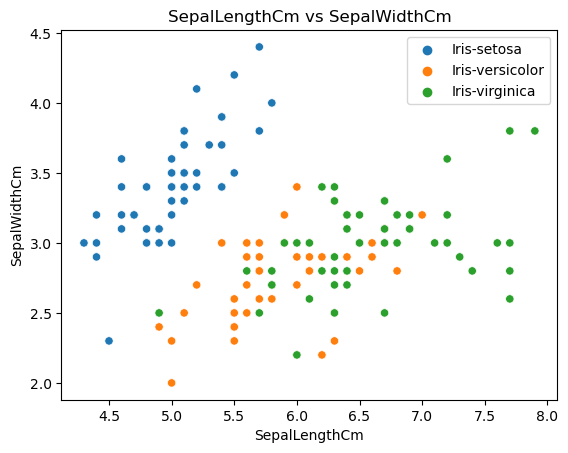

In [33]:
sas.scatterplot(data=df , x="SepalLengthCm" , y= "SepalWidthCm" ,hue="Species" )
plt.xlabel("SepalLengthCm");
plt.ylabel("SepalWidthCm");
plt.title("SepalLengthCm vs SepalWidthCm")
plt.legend()
plt.show()

7. Moderate: Calculate the correlation matrix between the four features (sepal length, sepal
width, petal length, petal width). Which pair of features has the highest positive correlation,
and which pair has the highest negative correlation?

1. highest positive : 0.962757 (petal length & width)
2. highest negative : 0.420516 (petal length & sepal width) 

In [34]:
df.corr()

C:\Users\win10\AppData\Local\Temp\ipykernel_17164\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


8. Moderate: Implement a Logistic Regression classifier to predict the species of iris
flowers based on the four features. Split the dataset into a training set and a testing set, and
evaluate the model's accuracy.

In [35]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
x = df.drop('Species' , axis = 1)
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
y = df["Species"]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [38]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)

In [39]:
logistec_regrission = LogisticRegression(max_iter = 10000)

logistec_regrission.fit(x_train , y_train)

y_pred = logistec_regrission.predict(x_test)

: Implement Polynomial Logistic Regression. Implement GridSearchCV to
find the best degree for the model

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


In [41]:
# Plot the decision boundary
#x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
#y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
#xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
#Z = logistec_regrission.predict(np.c_[xx.ravel(), yy.ravel()])
#Z = Z.reshape(xx.shape)

#plt.contourf(xx, yy, Z, alpha=0.8)
#plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k')
#plt.title("Logistic Regression Decision Boundary")
#plt.xlabel("Feature 1")
#plt.ylabel("Feature 2")
#plt.show()


9. Challenging: Implement Polynomial Logistic Regression. Implement GridSearchCV to
find the best degree for the model

In [42]:
#pipeline = Pipeline([
   # ("poly_feats" , PolynomialFeatures()),
   # ("logistec_regressor" , LogisticRegression(max_iter = 10000))
#])

In [43]:
#pipeline.fit(x_train, y_train)

In [44]:
#param_grid = {
 #     "poly_feats" : [PolynomialFeatures(degree=range(1,10))],
    #"logistec_regressor" : [LogisticRegression(max_iter = 10000)]
#}

In [45]:
#grid_search = GridSearchCV(estimator=logistec_regrission , param_grid=param_grid , cv=5 ,verbose=3)
#grid_search.fit(x_train , x_train)

In [46]:
param_grid = {"poly__degree" : range(2 , 11)}

In [47]:
Pipe = Pipeline([('poly' , PolynomialFeatures()),("CLF" , logistec_regrission )]) 

In [48]:
grid_s = GridSearchCV(Pipe , param_grid , cv=5 , verbose=3)

In [49]:
grid_s

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('CLF',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'poly__degree': range(2, 11)}, verbose=3)

In [50]:
grid_s.fit(x_train , y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....................poly__degree=2;, score=0.958 total time=   0.0s
[CV 2/5] END ....................poly__degree=2;, score=0.958 total time=   0.0s
[CV 3/5] END ....................poly__degree=2;, score=1.000 total time=   0.1s
[CV 4/5] END ....................poly__degree=2;, score=1.000 total time=   0.1s
[CV 5/5] END ....................poly__degree=2;, score=0.917 total time=   0.0s


[CV 1/5] END ....................poly__degree=3;, score=0.958 total time=   0.5s
[CV 2/5] END ....................poly__degree=3;, score=0.917 total time=   0.6s
[CV 3/5] END ....................poly__degree=3;, score=1.000 total time=   0.0s
[CV 4/5] END ....................poly__degree=3;, score=1.000 total time=   0.0s
[CV 5/5] END ....................poly__degree=3;, score=0.875 total time=   0.0s
[CV 1/5] END ....................poly__degree=4;, score=0.958 total time=   0.0s
[CV 2/5] END ....................poly__degree=4;, score=0.917 total time=   0.0s
[CV 3/5] END ....................poly__degree=4;, score=0.958 total time=   0.4s
[CV 4/5] END ....................poly__degree=4;, score=1.000 total time=   0.4s
[CV 5/5] END ....................poly__degree=4;, score=0.833 total time=   0.1s
[CV 1/5] END ....................poly__degree=5;, score=0.958 total time=   0.0s
[CV 2/5] END ....................poly__degree=5;, score=0.917 total time=   0.1s
[CV 3/5] END ...............

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('CLF',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'poly__degree': range(2, 11)}, verbose=3)